# "Modulo 1"
> "Analisi Monte-Carlo della termodinamica di network random"

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def initialstate(L,random=True,cold=+1):
    if random:
        state = 2*np.random.randint(2, size=L)-1
    elif cold==1:
        state = np.int_(np.ones(L))
    elif cold==-1:
        state = -np.int_(np.ones(L))
    else:
        return print("Put cold = +1 or -1")
    return state

In [18]:
def mcmove(config, beta,A):
    '''Monte Carlo move using Metropolis algorithm '''
    con=config.copy()
    N=con.size
    for i in range(N):
        a = np.random.randint(0, N)
        s =  con[a]
        cost=sum(-s*A[a,:]*con)-sum(s*A[a,:]*con)
        if -cost < 0:
            s = -s
        elif np.random.rand() < np.exp(cost*beta):
            s = -s
        con[a] = s
    return con

In [19]:
def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        S = config[i]
        energy += sum(-S*A[i]*config)
    return energy/config.size/4


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag/N

In [20]:
## Matrice di adiacenza per Ising 2D di lato L
L=4
N=L**2
A=np.zeros((N,N))
for i in range(N):
    A[i,(i+1)%N] =-1
    A[i,(i-1)%N] =-1
    A[i,(i+L)%N] =-1
    A[i,(i-L)%N] =-1
#A=np.int_(A)

import networkx as nx
#N=10
B=nx.adjacency_matrix(nx.watts_strogatz_graph(N, 2, .1))

#A=A-(np.eye(N)*B)
B

<16x16 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [21]:
A=-np.ones((N,N))

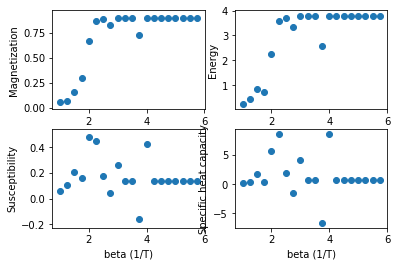

In [22]:
meas=20
dec=10
tn=20
ma=np.zeros(tn)
en=np.zeros(tn)
xi=np.zeros(tn)
cs=np.zeros(tn)
ma2=np.zeros(tn)
en2=np.zeros(tn)
m2=np.zeros(meas)
e2=np.zeros(meas)
mm=0
ee=0

for t in np.arange(tn):
    state=np.ones((meas,N))
    state[0]=initialstate(N,random=False,cold=+1)
    #state[0,:]=np.ones(N)
    e=np.zeros(meas)
    m=np.zeros(meas)
    m[0]=calcMag(state[0])

    for i in range(meas-1):       # misure
        for j in range(dec):      # decorrelazione
        #print(str(i)+": "+str(state))
            state[i+1,:]=mcmove(state[i,:], t/(tn/5), B).copy()
        m[i+1]=calcMag(state[i+1,:])
        e[i+1]=calcEnergy(state[i+1,:])
        m2[i+1]=m[i+1]*m[i+1]
        e2[i+1]=e[i+1]*e[i+1]
    m=m[meas//10:]
    ma[t]=sum(m)/meas
    ma2[t]=sum(m2)/meas
    en[t]=sum(e)/meas
    en2[t]=sum(e2)/meas
    xi[t]=ma2[t]-ma[t-1]**2
    cs[t]=en2[t]-en[t-1]**2

    
tempe=np.arange(tn)/(tn/5)+1
plt.figure()

plt.subplot(221)
plt.scatter(tempe,abs(ma))
plt.xlabel('beta (1/T)')
plt.ylabel('Magnetization')

plt.subplot(222)
plt.scatter(tempe,en)
plt.xlabel('beta (1/T)')
plt.ylabel('Energy')

plt.subplot(223)
plt.scatter(tempe,(xi))
plt.xlabel('beta (1/T)')
plt.ylabel('Susceptibility')

plt.subplot(224)
plt.scatter(tempe,(cs))
plt.xlabel('beta (1/T)')
plt.ylabel('Specific heat capacity')


plt.show()